## Import Libraries

In [1]:
#Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd 
import numpy as np 
import seaborn as sns 

#display the graphics made by python inline with the text
%matplotlib inline
import matplotlib.pyplot as plt 


from sklearn import (ensemble, preprocessing, tree,)

from sklearn.metrics import (auc, confusion_matrix, roc_auc_score, roc_curve,)

from sklearn.model_selection import ( train_test_split, StratifiedKFold,)

#Yellowbrick - is a visualization library for evaluating models:

from yellowbrick.classifier import ( ConfusionMatrix, ROCAUC, )

from yellowbrick.model_selection import ( LearningCurve,)

## Load data

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

## Pandas_Profiling
The pandas-profiling library includes a profile report. You can generate this report in a notebook. It will summarize the types of the columns and allow you to view details of quantile statistics, descriptive statistics, a histogram, common values, and extreme values

>>> conda install -c conda-forge pandas-profiling

>>> ! pip uninstall pandas-profiling

>>> ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

>>> from ipywidgets import widgets

>>> from pandas_profiling import ProfileReport

#Generate the report
>>> profile = ProfileReport (train, title="Pandas Profiling Report", html = {'style': {'full_width': True}})

#The notebook widget interface
>>> profile

#Or use the HTML report in an iframe
#profile.to_notebook_iframe()

## Understand the Data with Descriptive Statistics

In [3]:
#Check the shape and size of datasets
train.shape, test.shape, submission.shape

((108446, 42), (46477, 41), (46477, 2))

In [4]:
#peek at the data
train.tail()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,...,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
108441,ID_ZZYY7RTO,111,4,23.0,2,NaN,NaN,2,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,0
108442,ID_ZZYZTTC6,77,4,60.0,1,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,0
108443,ID_ZZZ3OW3S,42,2,59.0,1,NaN,1.0,1,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,2.0,1.0,2.0,1,1
108444,ID_ZZZLDXE8,57,7,79.0,1,NaN,NaN,2,NaN,1.0,...,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1,0
108445,ID_ZZZMYW1F,110,2,74.0,2,1.0,2.0,2,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1,1


In [5]:
#Look at first 5 records
test.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,...,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37
0,ID_000YI58E,39,2,22.0,2,NaN,NaN,2,NaN,1.0,...,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,0
1,ID_001SP4JF,30,2,62.0,1,NaN,NaN,2,NaN,1.0,...,2,NaN,NaN,2.0,NaN,1.0,1.0,1.0,1.0,0
2,ID_001VOF6S,65,4,35.0,2,1.0,NaN,1,1.0,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0
3,ID_0030LULG,123,0,24.0,2,1.0,NaN,2,NaN,1.0,...,2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1
4,ID_0037PZ3R,67,2,25.0,2,NaN,NaN,1,NaN,NaN,...,2,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,1


In [6]:
submission.head()

,ID,Target
0,ID_000YI58E,NaN
1,ID_001SP4JF,NaN
2,ID_001VOF6S,NaN
3,ID_0030LULG,NaN
4,ID_0037PZ3R,NaN


In [7]:
#Check the columns in the train dataset
train.columns

Index(['ID', 'country_code', 'region', 'age', 'FQ1', 'FQ2', 'FQ3', 'FQ4',
       'FQ5', 'FQ6', 'FQ7', 'FQ8', 'FQ9', 'FQ10', 'FQ11', 'FQ12', 'FQ13',
       'FQ14', 'FQ15', 'FQ16', 'FQ17', 'FQ18', 'FQ19', 'FQ20', 'FQ21', 'FQ22',
       'FQ23', 'FQ24', 'FQ35', 'FQ36', 'FQ25', 'FQ26', 'FQ27', 'FQ28', 'FQ29',
       'FQ30', 'FQ31', 'FQ32', 'FQ33', 'FQ34', 'FQ37', 'Target'],
      dtype='object')

In [8]:
#data type and columns of each attribute
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ2           49124 non-null   float64
 6   FQ3           46218 non-null   float64
 7   FQ4           108446 non-null  int64  
 8   FQ5           21185 non-null   float64
 9   FQ6           60659 non-null   float64
 10  FQ7           60620 non-null   float64
 11  FQ8           108446 non-null  int64  
 12  FQ9           108446 non-null  int64  
 13  FQ10          108446 non-null  int64  
 14  FQ11          83876 non-null   float64
 15  FQ12          108446 non-null  int64  
 16  FQ13          108446 non-null  int64  
 17  FQ14          108446 non-null  int64  
 18  FQ15

In [9]:
#Statistical summary
train.describe()

,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,...,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
count,108446.000000,108446.000000,108124.000000,108446.000000,49124.000000,46218.000000,108446.000000,21185.000000,60659.000000,60620.000000,...,3200.000000,1506.000000,83912.000000,2115.000000,869.000000,60796.000000,108444.000000,76652.000000,108446.000000,108446.000000
mean,68.544953,2.894242,41.857395,1.563294,1.063716,1.299710,1.824622,1.160113,1.223907,1.206961,...,1.578125,1.351262,1.860330,1.615130,1.436133,1.854744,1.178479,1.127511,0.631457,0.273970
std,41.529264,2.286505,17.876105,0.530077,0.288075,0.468503,0.435942,0.383827,0.450140,0.440780,...,0.563689,0.493938,0.382599,0.548808,0.557423,0.401499,0.398819,0.350632,0.482412,0.445996
min,0.000000,-1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,33.000000,1.000000,27.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,65.000000,3.000000,39.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,105.000000,4.000000,55.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,143.000000,7.000000,99.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000


## Examine Missing & Duplicated 
Data
There are also various ways to handle missing data:
 - Remove any row with missing data
 - Remove any column with missing data
 - Impute missing values


In [10]:
#Find duplicates
train.duplicated().any()

False

In [11]:
#train.isnull().any()

#Counting the Number of Null rows in each Column of the dataframe
train.isnull().sum()

ID                   0
country_code         0
region               0
age                322
FQ1                  0
FQ2              59322
FQ3              62228
FQ4                  0
FQ5              87261
FQ6              47787
FQ7              47826
FQ8                  0
FQ9                  0
FQ10                 0
FQ11             24570
FQ12                 0
FQ13                 0
FQ14                 0
FQ15                 0
FQ16                 0
FQ17             97099
FQ18                 0
FQ19             47407
FQ20             24679
FQ21             24635
FQ22                 0
FQ23                 0
FQ24             70014
FQ35             82557
FQ36             96963
FQ25                 0
FQ26                 0
FQ27            105246
FQ28            106940
FQ29             24534
FQ30            106331
FQ31            107577
FQ32             47650
FQ33                 2
FQ34             31794
FQ37                 0
Target               0
dtype: int64

To visualize patterns in the missing data, use the missingno library . This library is useful for viewing contiguous areas of missing data, which would indicate that the missing data is not random. The matrix function includes a sparkline along the right side. Patterns here would also indicate nonrandom missing data. You may need to limit the number of samples to be able to see the patterns:

C:\Users\supaki\AppData\Local\Programs\Python\Python38\lib\site-packages\missingno\missingno.py:197: UserWarning: The 'inline' argument has been deprecated, and will be removed in a future version of missingno.
  warnings.warn(


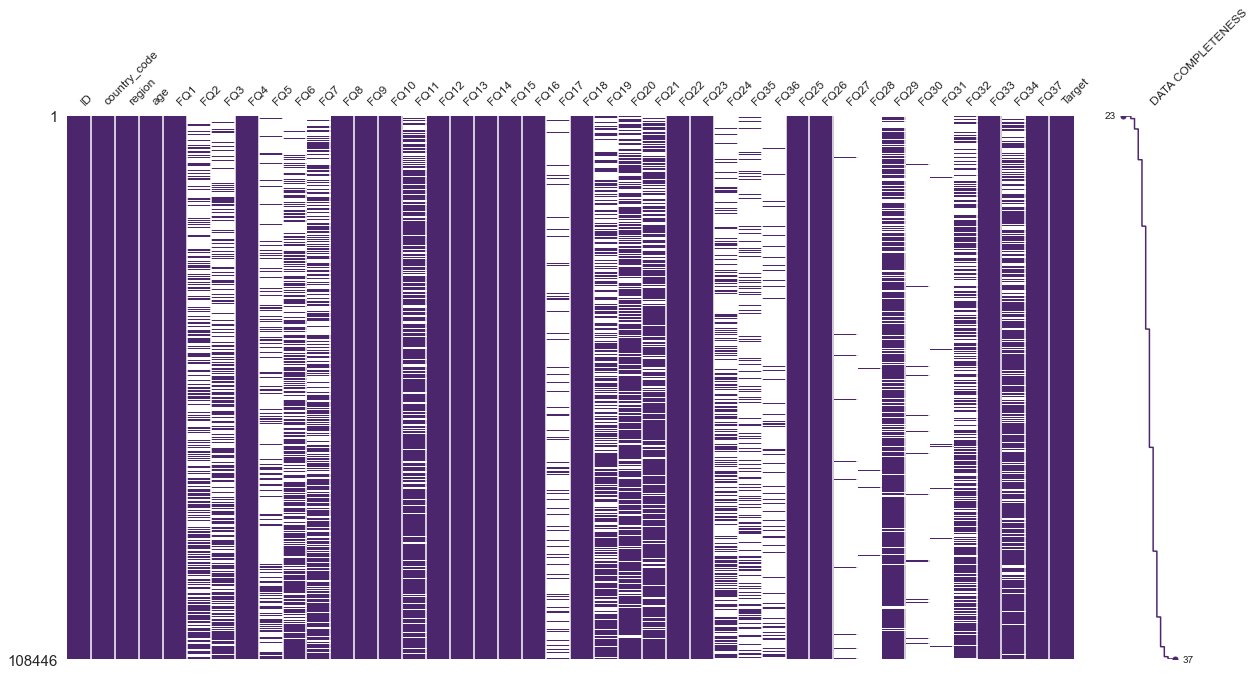

In [24]:
import missingno as msno
msno.matrix(train, inline=True, sparkline=True, figsize=(20,10), sort='ascending', fontsize=12, labels=True, color=(0.30, 0.15, 0.43))

In the figure above, where data is missing. No clear patterns jump out to the author.

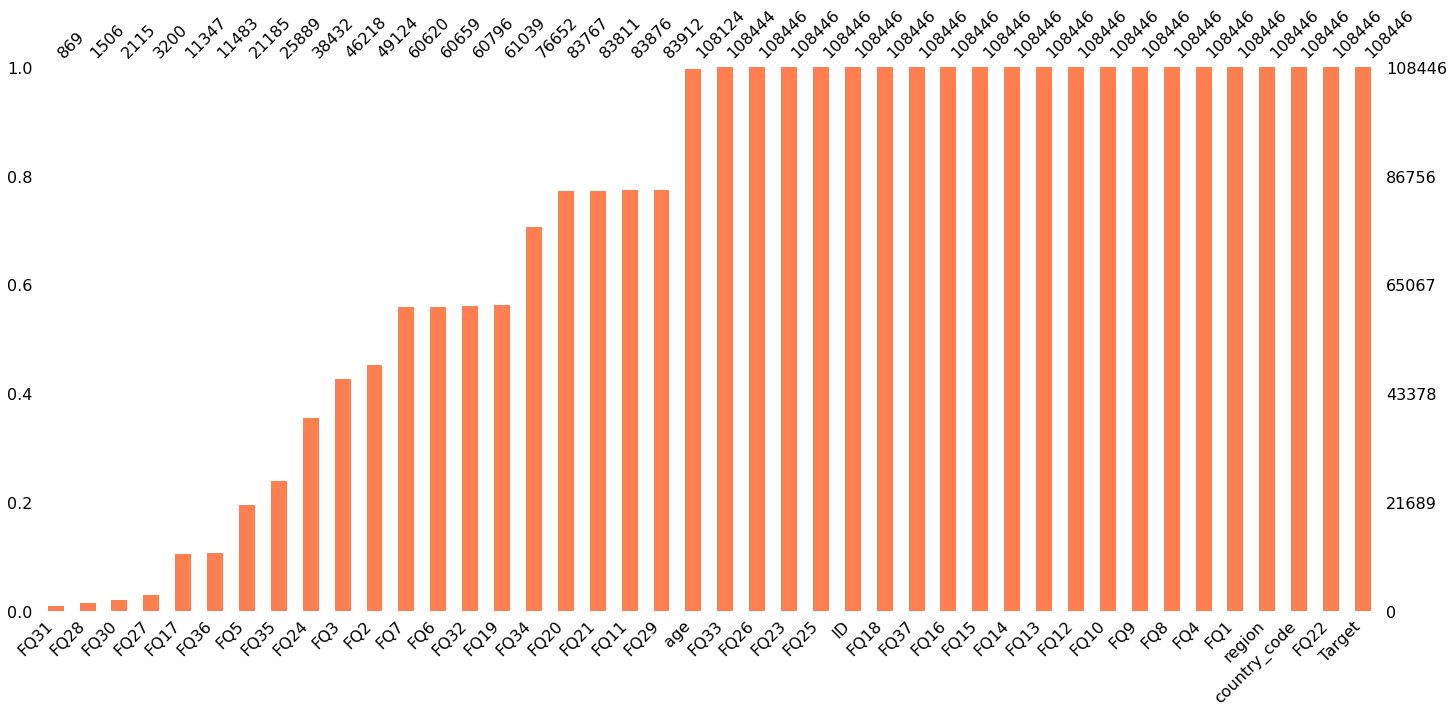

In [13]:
msno.bar(train, figsize=(24, 10), fontsize=16,color='coral', sort='ascending');

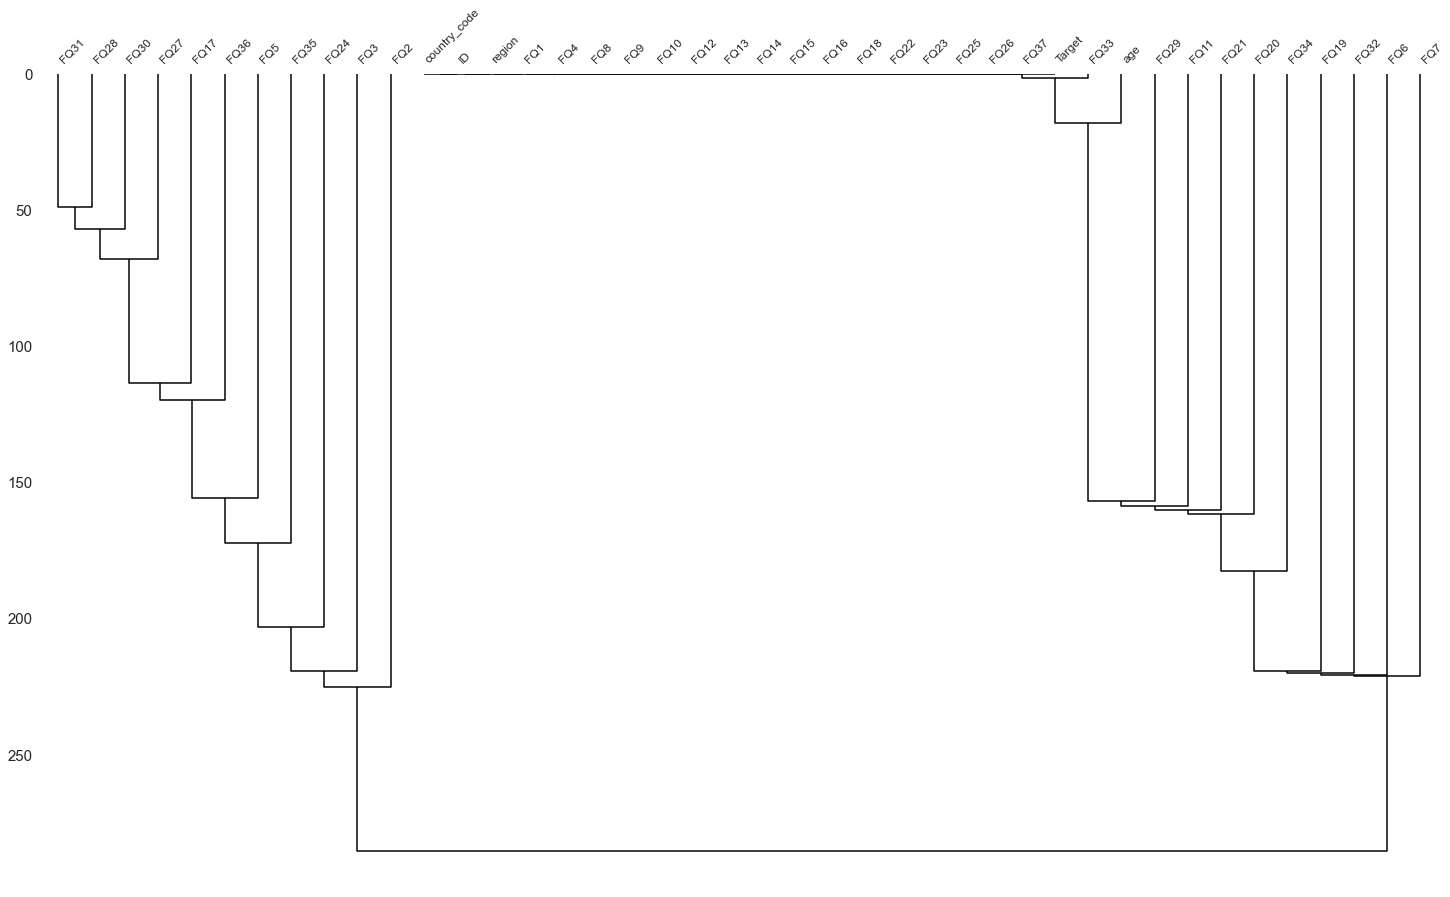

In [31]:
msno.dendrogram(train, inline=True, fontsize=12, figsize=(25,15));

Dendrogram of missing data with missingno. We can see the columns without missing data on the upper middle.

The dendrogram view shows how missing values are related across columns by using hierarchical clustering. Pretty cool!

Columns where most of the values are missing tend to not provide value and can be dropped


## Understand Your Data With Visualization

In [17]:
#Create a bar plot of % of missing data counts using pandas
missing_values = train.isnull().sum() / len(train) *100 #in percentage
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

FQ33     0.001844
age      0.296922
FQ29    22.623241
FQ11    22.656437
FQ21    22.716375
FQ20    22.756948
FQ34    29.317817
FQ19    43.714844
FQ32    43.938919
FQ6     44.065249
FQ7     44.101212
FQ2     54.701879
FQ3     57.381554
FQ24    64.561164
FQ35    76.127289
FQ5     80.464932
FQ36    89.411320
FQ17    89.536728
FQ27    97.049223
FQ30    98.049721
FQ28    98.611290
FQ31    99.198680
dtype: float64

In [18]:
missing_values.index

Index(['FQ33', 'age', 'FQ29', 'FQ11', 'FQ21', 'FQ20', 'FQ34', 'FQ19', 'FQ32',
       'FQ6', 'FQ7', 'FQ2', 'FQ3', 'FQ24', 'FQ35', 'FQ5', 'FQ36', 'FQ17',
       'FQ27', 'FQ30', 'FQ28', 'FQ31'],
      dtype='object')

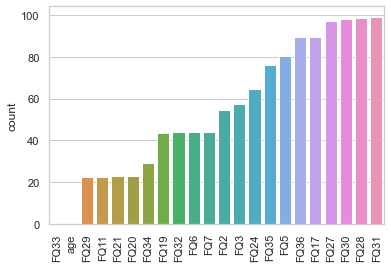

In [19]:
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = missing_values.index, y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()


#Creating correlation matrix on data
msno.heatmap(missing_values)

#select/view by column name 
>>> train['Target'].tail()


Columns with type of object tend to be categorical (but they may also be high cardinality string data, or a mix of column types). For object columns that we believe to be categorical, use the .value_counts method to examine the counts of the values:

In [ ]:
train.dtypes

>>> df.sex.value_counts(dropna=False)

Remember that pandas typically ignores null or NaN values. If you want to include those, use dropna=False to also show counts for NaN:
>>> df.embarked.value_counts(dropna=False)


## Dealing with Missing Values

In [36]:
# Total missing values for each feature
print (train.isnull().sum()/ len(train)*100)

ID               0.000000
country_code     0.000000
region           0.000000
age              0.296922
FQ1              0.000000
FQ2             54.701879
FQ3             57.381554
FQ4              0.000000
FQ5             80.464932
FQ6             44.065249
FQ7             44.101212
FQ8              0.000000
FQ9              0.000000
FQ10             0.000000
FQ11            22.656437
FQ12             0.000000
FQ13             0.000000
FQ14             0.000000
FQ15             0.000000
FQ16             0.000000
FQ17            89.536728
FQ18             0.000000
FQ19            43.714844
FQ20            22.756948
FQ21            22.716375
FQ22             0.000000
FQ23             0.000000
FQ24            64.561164
FQ35            76.127289
FQ36            89.411320
FQ25             0.000000
FQ26             0.000000
FQ27            97.049223
FQ28            98.611290
FQ29            22.623241
FQ30            98.049721
FQ31            99.198680
FQ32            43.938919
FQ33        

To drop all rows with 'any' NAs in a particular column, I used .dropna() and specified the subset = column.

In [38]:
train.isnull().sum()

ID                   0
country_code         0
region               0
age                322
FQ1                  0
FQ2              59322
FQ3              62228
FQ4                  0
FQ5              87261
FQ6              47787
FQ7              47826
FQ8                  0
FQ9                  0
FQ10                 0
FQ11             24570
FQ12                 0
FQ13                 0
FQ14                 0
FQ15                 0
FQ16                 0
FQ17             97099
FQ18                 0
FQ19             47407
FQ20             24679
FQ21             24635
FQ22                 0
FQ23                 0
FQ24             70014
FQ35             82557
FQ36             96963
FQ25                 0
FQ26                 0
FQ27            105246
FQ28            106940
FQ29             24534
FQ30            106331
FQ31            107577
FQ32             47650
FQ33                 2
FQ34             31794
FQ37                 0
Target               0
dtype: int64

In [39]:
train.dropna(subset = ['FQ33'], axis = 0, how = 'any', inplace = True)
train.isnull().sum()

ID                   0
country_code         0
region               0
age                322
FQ1                  0
FQ2              59321
FQ3              62228
FQ4                  0
FQ5              87259
FQ6              47786
FQ7              47825
FQ8                  0
FQ9                  0
FQ10                 0
FQ11             24569
FQ12                 0
FQ13                 0
FQ14                 0
FQ15                 0
FQ16                 0
FQ17             97097
FQ18                 0
FQ19             47406
FQ20             24679
FQ21             24635
FQ22                 0
FQ23                 0
FQ24             70013
FQ35             82556
FQ36             96961
FQ25                 0
FQ26                 0
FQ27            105244
FQ28            106938
FQ29             24533
FQ30            106329
FQ31            107575
FQ32             47649
FQ33                 0
FQ34             31794
FQ37                 0
Target               0
dtype: int64

In [ ]:
train.drop(columns="cabin")

In [ ]:
#Class Distribution
target_counts = train.groupby('Target').size()
print(target_counts)

You can see that there are nearly triple the number of observations with target 0 than there are with target 1.

## Examine Target Column

In [ ]:
train['Target'].value_counts()

In [ ]:
s = sns.countplot(x = 'Target',data = train)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center", fontsize=14) 

## Create Features

sns.pairplot(train, hue='Target', size=1.5);

In [ ]:
# Select first three rows
train.iloc[1:4]

## Replace Multiple Values in Multiple Columns

Target Category:
- 1: Yes
- 2: No
- 3: Don’t know 
- 4: Refused to answer

train.count()

train.replace({'FQ1': {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ2' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ3' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ4' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'},
'FQ5' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ6'{1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'},
'FQ7' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'},
'FQ8' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'},
'FQ9' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ10' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ11'{1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ12' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ13'{1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'},
'FQ14' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ15' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ16' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ17' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ18' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ19' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ20' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ21' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ22' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'},
'FQ23' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ24' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ35' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ36'{1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ25'{1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ26' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ27' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ28' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ29' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'},
'FQ30'{1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ31' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ32' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ33' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ34' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}, 
'FQ37' {1: 'Yes', 2: 'No', 3: 'Don’t know', 4: 'Refused to answer'}})

In [ ]:
train.columns

In [ ]:
# Select unique values
train['country_code'].unique()


In [ ]:
# Alternatively, value_counts will display all unique values with the number of times each value appears:
# Show counts
train['country_code'].value_counts()

In [ ]:
# Select unique values
train['region'].value_counts()

Both unique and value_counts are useful for manipulating and exploring categorical
columns.

In [ ]:
train['FQ1'].value_counts()

In [ ]:
train['FQ4'].value_counts()

In [ ]:
train.dtypes

In [ ]:
#Change multiple columns with float to int
train[['FQ1', 'FQ2', 'FQ3', 'FQ4',
       'FQ5', 'FQ6', 'FQ7', 'FQ8', 'FQ9', 'FQ10', 'FQ11', 'FQ12', 'FQ13',
       'FQ14', 'FQ15', 'FQ16', 'FQ17', 'FQ18', 'FQ19', 'FQ20', 'FQ21', 'FQ22',
       'FQ23', 'FQ24', 'FQ35', 'FQ36', 'FQ25', 'FQ26', 'FQ27', 'FQ28', 'FQ29',
       'FQ30', 'FQ31', 'FQ32', 'FQ33', 'FQ34', 'FQ37']].astype(int)

In [ ]:
train.dtypes